In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Load the data
df = pd.read_csv('fake_currency_data updated(1).csv')

# Drop unused columns
df = df.drop(columns=['SerialNumber', 'Country'])  # Optional: you can keep Country if encoded later

# Handle missing values if any
df = df.dropna()

# Features and target
X = df[['Denomination', 'SecurityFeatures', 'Weight', 'Length', 'Width', 'Thickness']]
y = df['Counterfeit']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Load the data
df = pd.read_csv('fake_currency_data updated(1).csv')

# Drop unused columns
df = df.drop(columns=['SerialNumber', 'Country'])  # Optional: you can keep Country if encoded later

# Handle missing values if any
df = df.dropna()

# Features and target
X = df[['Denomination', 'SecurityFeatures', 'Weight', 'Length', 'Width', 'Thickness']]
y = df['Counterfeit']

# ----> Convert 'Denomination' and 'SecurityFeatures' to numerical using pandas get_dummies
X = pd.get_dummies(X, columns=['Denomination', 'SecurityFeatures'], drop_first=True) # drop_first to avoid dummy variable trap


# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

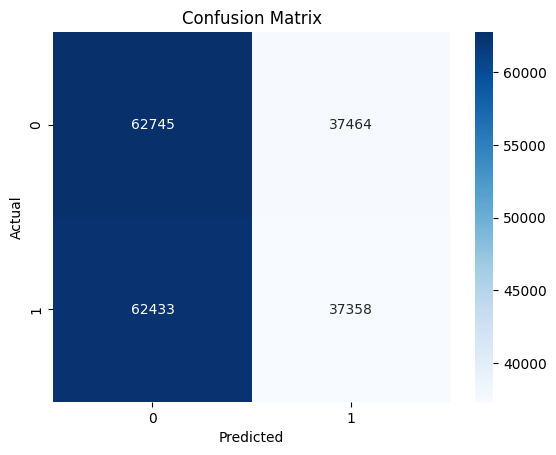

              precision    recall  f1-score   support

           0       0.50      0.63      0.56    100209
           1       0.50      0.37      0.43     99791

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.49    200000
weighted avg       0.50      0.50      0.49    200000



In [11]:
# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [12]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coeffs)


                        Feature  Coefficient
0                        Weight    -0.000008
1                        Length    -0.000206
2                         Width     0.000295
3                     Thickness     0.000774
4            Denomination_Rs.10     0.005716
5           Denomination_Rs.100    -0.007243
6            Denomination_Rs.20    -0.002653
7             Denomination_Rs.5    -0.002278
8            Denomination_Rs.50     0.005937
9   SecurityFeatures_Microprint     0.010799
10   SecurityFeatures_Watermark     0.003433


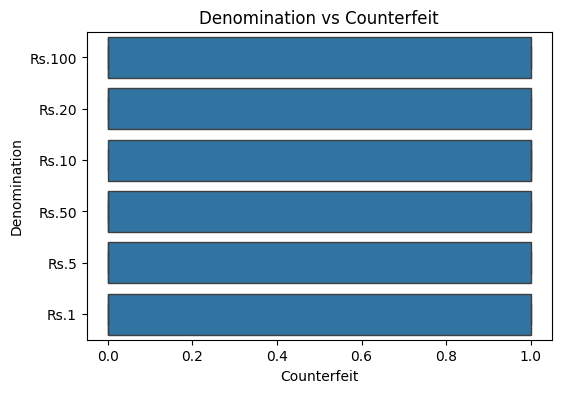

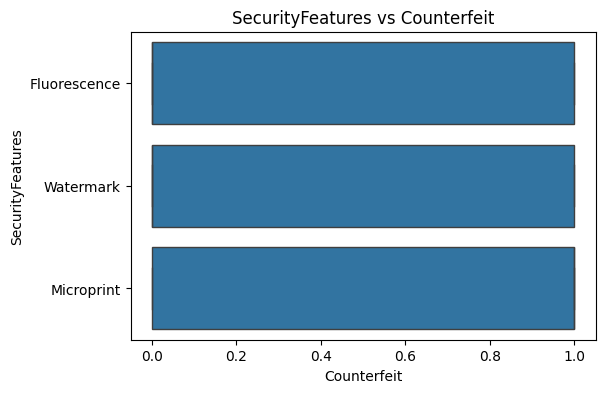

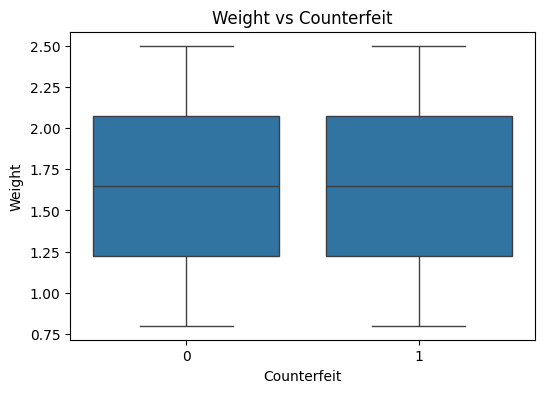

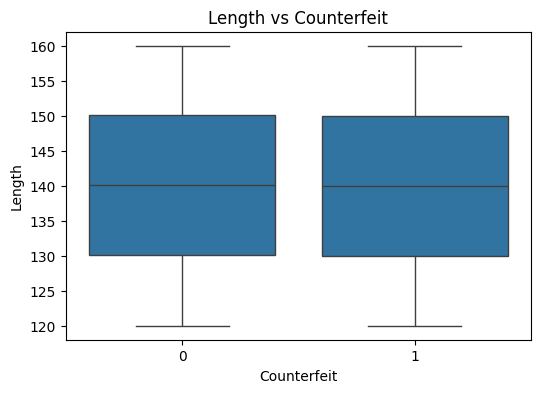

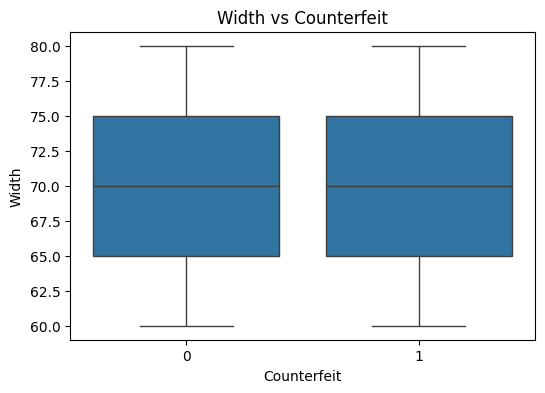

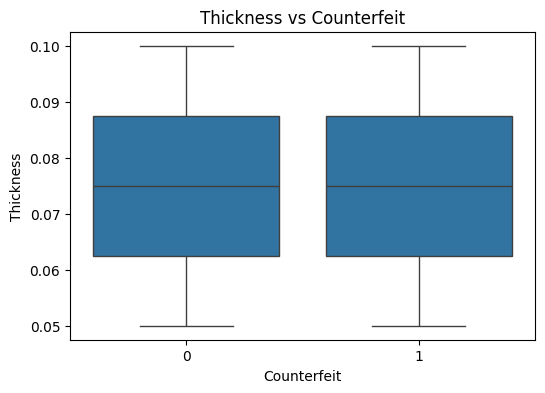

In [13]:
features = ['Denomination', 'SecurityFeatures', 'Weight', 'Length', 'Width', 'Thickness']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Counterfeit', y=feature, data=df)
    plt.title(f"{feature} vs Counterfeit")
    plt.show()

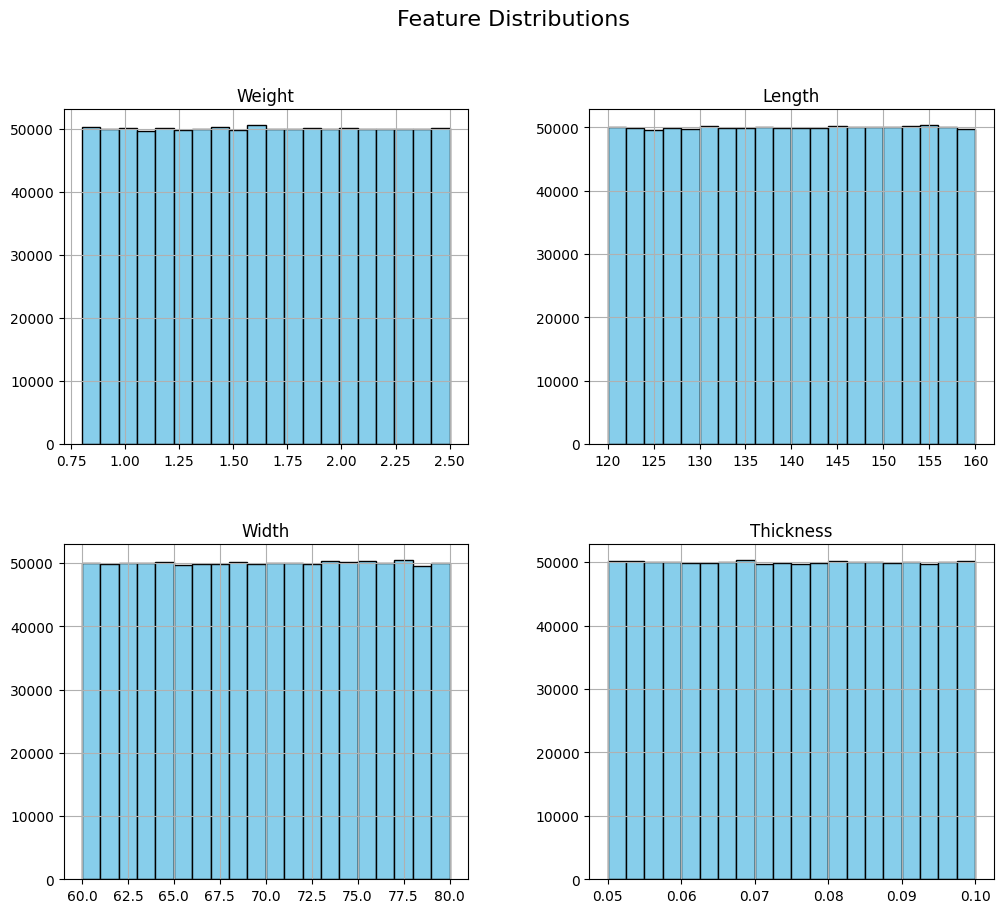

In [14]:
df[features].hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
